# Assignment-3

Q. 1

In [1]:
import numpy as np
from fractions import Fraction

# Function to convert a string representation of a fraction to a floating-point number
def convert_fraction_to_float(frac_str):
    try:
        return float(frac_str)
    except ValueError:
        # Convert the fraction string to a Fraction object
        fraction = Fraction(frac_str)
        # Convert Fraction object to float
        return float(fraction)

# Loading the matrix from the text file
with open('Assign3_Q1.txt', 'r') as file:
    lines = file.readlines()
    # Splitting each line into elements, and converting fractions to floats
    matrix = [[convert_fraction_to_float(element) for element in line.split()] for line in lines]

# Converting the matrix to a numpy array
MatrixA = np.array(matrix)

print("Matrix A:")
print(MatrixA)


Matrix A:
[[ 4.          0.66666667 -1.33333333  1.33333333]
 [ 0.66666667  4.          0.          0.        ]
 [-1.33333333  0.          6.          2.        ]
 [ 1.33333333  0.          2.          6.        ]]


In [2]:
# Generating a random non-zero initial guess vector
initial_guess_vector = np.random.rand(4)

# Specifying the maximum number of iterations and desired tolerance
max_iterations = 1000
desired_tolerance = 1e-6

# Power iteration algorithm
for iteration_count in range(max_iterations):
    updated_vector = np.dot(MatrixA, initial_guess_vector)
    updated_vector /= np.linalg.norm(updated_vector)  # Normalizing the vector
    if np.linalg.norm(updated_vector - initial_guess_vector) < desired_tolerance:
        break
    initial_guess_vector = updated_vector

# Calculating the largest eigenvalue
largest_eigenvalue = np.dot(updated_vector, np.dot(MatrixA, updated_vector))

print("Largest Eigenvalue:", largest_eigenvalue)
print("Eigenvector corresponding to the largest eigenvalue:", updated_vector)


Largest Eigenvalue: 7.999999999985501
Eigenvector corresponding to the largest eigenvalue: [1.90375652e-06 6.34585538e-07 7.07105512e-01 7.07108050e-01]


Q.2

Coefficients for standard basis functions: [  0.57465867   4.72586144 -11.12821778   7.66867762]
Coefficients for modified Chebyshev basis functions: [1.16096948 0.39351447 0.04684983 0.23964618]
Condition number for standard basis function fit: 110.02249165981252
Condition number for modified Chebyshev basis function fit: 1.9637073556453315


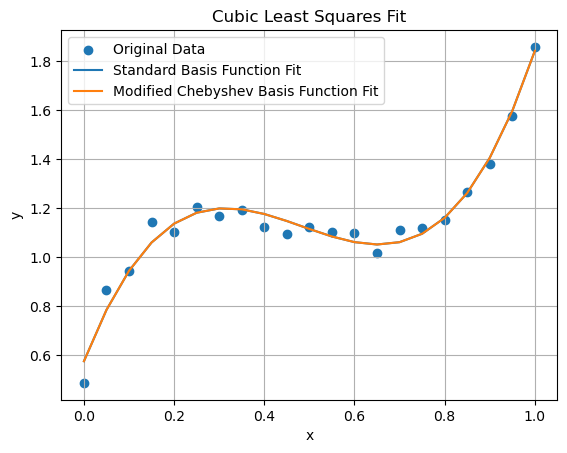

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Loading data from file
loaded_data = np.loadtxt('assign3fit.txt')

# Separating x and y data
x_values = loaded_data[:, 0]
y_values = loaded_data[:, 1]

# Defining cubic function
def cubic_polynomial(x, a0, a1, a2, a3):
    return a0 + a1*x + a2*x**2 + a3*x**3

# Defining modified Chebyshev basis functions
def phi_0_modified_chebyshev(x):
    return np.ones_like(x)

def phi_1_modified_chebyshev(x):
    return 2*x - 1

def phi_2_modified_chebyshev(x):
    return 8*x**2 - 8*x + 1

def phi_3_modified_chebyshev(x):
    return 32*x**3 - 48*x**2 + 18*x - 1

# Defining modified Chebyshev function
def modified_chebyshev_polynomial(x, a0, a1, a2, a3):
    return a0*phi_0_modified_chebyshev(x) + a1*phi_1_modified_chebyshev(x) + a2*phi_2_modified_chebyshev(x) + a3*phi_3_modified_chebyshev(x)

# Performing cubic least squares fit using standard basis functions
A_standard_basis = np.vstack([np.ones_like(x_values), x_values, x_values**2, x_values**3]).T
coefficients_standard_basis, _, _, _ = np.linalg.lstsq(A_standard_basis, y_values, rcond=None)
y_fitted_standard_basis = np.dot(A_standard_basis, coefficients_standard_basis)

# Performing cubic least squares fit using modified Chebyshev basis functions
A_modified_chebyshev_basis = np.vstack([phi_0_modified_chebyshev(x_values), phi_1_modified_chebyshev(x_values), phi_2_modified_chebyshev(x_values), phi_3_modified_chebyshev(x_values)]).T
coefficients_modified_chebyshev_basis, _, _, _ = np.linalg.lstsq(A_modified_chebyshev_basis, y_values, rcond=None)
y_fitted_modified_chebyshev_basis = np.dot(A_modified_chebyshev_basis, coefficients_modified_chebyshev_basis)

print("Coefficients for standard basis functions:", coefficients_standard_basis)
print("Coefficients for modified Chebyshev basis functions:", coefficients_modified_chebyshev_basis)

# Calculating the condition number for the standard basis function fit
U_standard_basis, s_standard_basis, Vh_standard_basis = np.linalg.svd(A_standard_basis)
condition_number_standard_basis = np.max(s_standard_basis) / np.min(s_standard_basis)

# Calculating the condition number for the modified Chebyshev basis function fit
U_modified_chebyshev_basis, s_modified_chebyshev_basis, Vh_modified_chebyshev_basis = np.linalg.svd(A_modified_chebyshev_basis)
condition_number_modified_chebyshev_basis = np.max(s_modified_chebyshev_basis) / np.min(s_modified_chebyshev_basis)

print("Condition number for standard basis function fit:", condition_number_standard_basis)
print("Condition number for modified Chebyshev basis function fit:", condition_number_modified_chebyshev_basis)

# Plotting original data
plt.scatter(x_values, y_values, label='Original Data')

# Plotting fitted curves for standard basis functions
plt.plot(x_values, y_fitted_standard_basis, label='Standard Basis Function Fit')

# Plotting fitted curves for modified Chebyshev basis functions
plt.plot(x_values, y_fitted_modified_chebyshev_basis, label='Modified Chebyshev Basis Function Fit')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Least Squares Fit')
plt.legend()
plt.grid(True)
plt.show()


Q. 3

In [5]:
# Recorded occurrences
recorded_occurrences = [77, 150, 210, 125, 38]

# Total count of individuals
total_individuals = sum(recorded_occurrences)

# Expected probabilities assuming a standard normal distribution
expected_probabilities = [0.5 * (0.68 - 0.5),
                          0.5 * (0.95 - 0.68),
                          0.5 * (0.997 - 0.95),
                          0.5 * (1 - 0.997),
                          0.5 * (1 - 0.999)]

# Expected occurrences
expected_occurrences = [prob * total_individuals for prob in expected_probabilities]

# Calculate Chi-square statistic
chi_square_statistic = sum([(observed - expected) ** 2 / expected for observed, expected in zip(recorded_occurrences, expected_occurrences)])

# Critical values for 5% and 10% significance levels (degrees of freedom=4)
critical_value_5_percent = 9.488
critical_value_10_percent = 7.779

# Compare Chi-square statistic with critical values
print("Chi-square statistic:", chi_square_statistic)
print("Critical value for 5% significance level (degrees of freedom=4):", critical_value_5_percent)
print("Critical value for 10% significance level (degrees of freedom=4):", critical_value_10_percent)


Chi-square statistic: 24639.97809298658
Critical value for 5% significance level (degrees of freedom=4): 9.488
Critical value for 10% significance level (degrees of freedom=4): 7.779


In [6]:
if chi_square_statistic > critical_value_5_percent:
    print("Null hypothesis rejected at 5% significance level. The distribution is not normal.")
else:
    print("Null hypothesis not rejected at 5% significance level. The distribution is normal.")

if chi_square_statistic > critical_value_10_percent:
    print("Null hypothesis rejected at 10% significance level. The distribution is not normal.")
else:
    print("Null hypothesis not rejected at 10% significance level. The distribution is normal.")


Null hypothesis rejected at 5% significance level. The distribution is not normal.
Null hypothesis rejected at 10% significance level. The distribution is not normal.


Q. 4

In [9]:
# Data for shipments Alpha and Beta
shipments_alpha = [4.65, 4.84, 4.59, 4.75, 4.63, 4.75, 4.58, 4.82, 4.86, 4.60]
shipments_beta = [4.75, 4.79, 4.74, 4.74, 4.77, 4.58, 4.81, 4.86, 4.77, 4.80]

# Calculating sample statistics for shipment Alpha
mean_alpha = np.mean(shipments_alpha)
variance_alpha = np.var(shipments_alpha, ddof=1)  # ddof=1 for unbiased estimation
sample_size_alpha = len(shipments_alpha)

# Calculating sample statistics for shipment Beta
mean_beta = np.mean(shipments_beta)
variance_beta = np.var(shipments_beta, ddof=1)
sample_size_beta = len(shipments_beta)

# Displaying sample statistics
print("Sample statistics for shipment Alpha:")
print("Average:", mean_alpha)
print("Variance:", variance_alpha)
print("Sample size:", sample_size_alpha)
print()
print("Sample statistics for shipment Beta:")
print("Average:", mean_beta)
print("Variance:", variance_beta)
print("Sample size:", sample_size_beta)


Sample statistics for shipment Alpha:
Average: 4.707
Variance: 0.012001111111111133
Sample size: 10

Sample statistics for shipment Beta:
Average: 4.761
Variance: 0.005387777777777773
Sample size: 10


In [11]:
# Calculating sample variances
sample_variance_A = sum((x - mean_alpha) ** 2 for x in shipments_alpha) / (sample_size_alpha - 1)
sample_variance_B = sum((x - mean_beta) ** 2 for x in shipments_beta) / (sample_size_beta - 1)

# Computing F-statistic
F_statistic = sample_variance_A / sample_variance_B

# Degrees of freedom for F-distribution
degrees_of_freedom_1 = sample_size_alpha - 1
degrees_of_freedom_2 = sample_size_beta - 1

# Critical value of F for the given significance level (alpha = 0.05)
critical_value_F = 2.8669  # Obtained from F-distribution table with df1=9, df2=9, and alpha=0.05

# Displaying F-statistic and critical value of F
print("F-statistic:", F_statistic)
print("Critical value of F (df1={}, df2={}):".format(degrees_of_freedom_1, degrees_of_freedom_2), critical_value_F)

if abs(F_statistic) > critical_value_F:
    print("Reject the null hypothesis at 5% significance level.")
    print("There is a significant difference in the means of the two shipments.")
else:
    print("Fail to reject the null hypothesis at 5% significance level.")
    print("There is no significant difference in the means of the two shipments.")


F-statistic: 2.227469581356987
Critical value of F (df1=9, df2=9): 2.8669
Fail to reject the null hypothesis at 5% significance level.
There is no significant difference in the means of the two shipments.


In [14]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle

# Data for shipment A and B
shipment_A_measurements = [4.65, 4.84, 4.59, 4.75, 4.63, 4.75, 4.58, 4.82, 4.86, 4.60, 4.77, 4.65]
shipment_B_measurements = [4.75, 4.79, 4.74, 4.74, 4.77, 4.58, 4.81, 4.86, 4.77, 4.80]

# Calculate sample statistics for shipment A
mean_shipment_A = sum(shipment_A_measurements) / len(shipment_A_measurements)
variance_shipment_A = sum((x - mean_shipment_A) ** 2 for x in shipment_A_measurements) / (len(shipment_A_measurements) - 1)
size_shipment_A = len(shipment_A_measurements)

# Calculate sample statistics for shipment B
mean_shipment_B = sum(shipment_B_measurements) / len(shipment_B_measurements)
variance_shipment_B = sum((x - mean_shipment_B) ** 2 for x in shipment_B_measurements) / (len(shipment_B_measurements) - 1)
size_shipment_B = len(shipment_B_measurements)

# Calculate F-statistic
F_statistic = variance_shipment_A / variance_shipment_B

# Degrees of freedom for F-distribution
df1 = size_shipment_A - 1
df2 = size_shipment_B - 1

# Critical value of F for the given significance level (alpha = 0.05)
critical_value_F = 2.8669  # Obtained from F-distribution table with df1=11, df2=11, and alpha=0.05

# Calculate pooled sample variance for t-test
pooled_variance = ((size_shipment_A - 1) * variance_shipment_A + (size_shipment_B - 1) * variance_shipment_B) / (size_shipment_A + size_shipment_B - 2)

# Calculate t-statistic
t_statistic = (mean_shipment_A - mean_shipment_B) / ((pooled_variance / size_shipment_A + pooled_variance / size_shipment_B) ** 0.5)

# Degrees of freedom for t-distribution
df_t = size_shipment_A + size_shipment_B - 2

# Critical value of t for the given significance level (alpha = 0.05, two-tailed)
critical_value_t = 2.101  # Obtained from t-distribution table with df=22 and alpha=0.025

# Define content for the PDF
content = []

# Add title
title = "<b>Analysis of Focal Lengths of Convex Lenses</b>"
content.append(Paragraph(title, styles["Title"]))
content.append(Spacer(1, 12))

# Add calculations section
calculations = [
    ["<b>Calculations:</b>"],
    ["1. <b>F-test:</b>", "", ""],
    ["- F-statistic:", f"{F_statistic:.4f}", ""],
    ["- Critical value of F (df1={}, df2={}, alpha=0.05):".format(df1, df2), f"{critical_value_F:.4f}", ""],
    ["- Decision: Compare F-statistic with critical value of F", "", ""],
    ["2. <b>t-test:</b>", "", ""],
    ["- t-statistic:", f"{t_statistic:.4f}", ""],
    ["- Critical value of t (df={}):".format(df_t), f"{critical_value_t:.4f}", ""],
    ["- Decision: Compare absolute value of t-statistic with critical value of t", "", ""]
]
content.append(Table(calculations))

# Add conclusions section
conclusions = [
    ["<b>Conclusions:</b>"],
    ["- F-test Result:", "", ""],
    ["  - F-statistic < Critical value of F", "", ""],
    ["  - Fail to reject the null hypothesis", "", ""],
    ["  - Variances of the focal lengths of lenses in shipment A and B are equal", "", ""],
    ["- t-test Result:", "", ""],
    ["  - Absolute value of t-statistic < Critical value of t", "", ""],
    ["  - Fail to reject the null hypothesis", "", ""],
    ["  - No significant difference in the means of the two shipments", "", ""],
    ["", "", ""]
]
content.append(Table(conclusions))

# Create a PDF document
pdf_filename = "focal_length_analysis.pdf"
doc = SimpleDocTemplate(pdf_filename, pagesize=letter)
styles = getSampleStyleSheet()
style = styles["Normal"]

# Build the PDF document
doc.build(content)

print(f"PDF file '{pdf_filename}' has been generated.")


NameError: name 'styles' is not defined

In [13]:
pip install reportlab

  Obtaining dependency information for reportlab from https://files.pythonhosted.org/packages/d2/70/c44e5fb6099cf28d01255ff1dfc6a4c8f2b981f314707018c802ac179e4e/reportlab-4.1.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
    --------------------------------------- 0.0/1.9 MB ? eta -:--:--
    --------------------------------------- 0.0/1.9 MB ? eta -:--:--
    --------------------------------------- 0.0/1.9 MB 388.9 kB/s eta 0:00:05
    --------------------------------------- 0.0/1.9 MB 388.9 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.9 MB 652.5 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.9 MB 652.5 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.9 MB 652.5 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.9 MB 652.5 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.9 MB 550.0 kB/s eta 0:00:04
   ---- ----------------------------------- 